In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [103]:

cab_data= pd.read_csv('/content/drive/MyDrive/DataSets/Cab_Data.csv')
city_data =pd.read_csv('/content/drive/MyDrive/DataSets/City.csv')
customer_id_data=pd.read_csv('/content/drive/MyDrive/DataSets/Customer_ID.csv')
transaction_id_data=pd.read_csv('/content/drive/MyDrive/DataSets/Transaction_ID.csv')

print("Cab Data: ", cab_data.shape)
print("City Data: ", city_data.shape)
print("Customer ID Data: ", customer_id_data.shape)
print("Transaction ID Data: ", transaction_id_data.shape)

#Firstly, DATA PREPARATION

# I observed that in the city dataset, there are comma seperated values.
#To prevent from misunderstanding, commas should be removed.

# Remove commas from 'Population' and 'Users' columns
city_data['Population'] = city_data['Population'].str.replace(',', '')
city_data['Users'] = city_data['Users'].str.replace(',', '')

# Convert the columns to integers
city_data['Population'] = city_data['Population'].astype(int)
city_data['Users'] = city_data['Users'].astype(int)

Cab Data:  (359392, 7)
City Data:  (20, 3)
Customer ID Data:  (49171, 4)
Transaction ID Data:  (440098, 3)


In [5]:
#Date of Travel column should be changed to date format appropriate for reading
#The Date of Travel column should be seperated to 3 different column Day, Month, Year

start_date = dt.date(1900, 1, 1)  # starting date of the data

def convert_date(x):
    delta = dt.timedelta(days=x-1)  # subtracting  1 to account for starting date
    return start_date + delta

cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(convert_date)


In [6]:
# Extracting day, month, and year from the "Date" column
cab_data['Day'] = cab_data['Date of Travel'].apply(lambda x: x.day)
cab_data['Month'] = cab_data['Date of Travel'].apply(lambda x: x.month)
cab_data['Year'] = cab_data['Date of Travel'].apply(lambda x: x.year)



In [7]:
print("Minimum Date: ", cab_data['Date of Travel'].min())
print("Maximum Date: ", cab_data['Date of Travel'].max())

Minimum Date:  2016-01-03
Maximum Date:  2019-01-01


In [8]:

print(cab_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Day', 'Month', 'Year'],
      dtype='object')


In [9]:
#Creating the copies of each dataset
cab_copy=cab_data
city_copy=city_data
customer_copy=customer_id_data
transaction_copy= transaction_id_data


In [10]:
#Transaction_id and customer_id both contains customer_id
#We can create a new dataset that contains data from both tables.
merged_df = pd.merge(transaction_copy, customer_copy, on='Customer ID')
#merged_df

#merged_df and cab_copy both contain transaction_id
#We can create a new dataset that contains data from both tables
merged_df2=pd.merge(merged_df,cab_copy, on='Transaction ID')
#merged_df2

#Now, only thing left is city dataset.
#Since we have information about city in the merged_df2 table, we can also add data from city dataset 
merged_df3=pd.merge(merged_df2,city_copy, on='City')
#merged_df3


In [11]:
#We can add net profit
merged_df3['Profit'] = merged_df3['Price Charged'] - merged_df3['Cost of Trip']

In [12]:
#Checking to see if there are any duplicate values
merged_df3.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

In [13]:
# merged_df3 will be the master data.

masterdata=merged_df3

In [14]:
#there are no missing values
missingdata= masterdata.isna()
missingdata.sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Day                   0
Month                 0
Year                  0
Population            0
Users                 0
Profit                0
dtype: int64

In [16]:
masterdata.describe()

#DATA PREPARETION ends here. Now, we'll start to invstigate the data.

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Day,Month,Year,Population,Users,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,15.596268,7.474627,2017.050168,3.132198e+06,158365.582267,137.253198
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,8.809464,3.457718,0.801146,3.315194e+06,100850.051020,160.311840
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,1.000000,1.000000,2016.000000,2.489680e+05,3643.000000,-220.060000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,8.000000,5.000000,2016.000000,6.712380e+05,80021.000000,28.012000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,16.000000,8.000000,2017.000000,1.595037e+06,144132.000000,81.962000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,23.000000,10.000000,2018.000000,8.405837e+06,302149.000000,190.030000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,31.000000,12.000000,2019.000000,8.405837e+06,302149.000000,1463.966000


In [33]:
#Some of the columns should be identified to see how many unique values they contain and what are they.
#Columns such as date, transaction id, age, etc. are not necessary to identify. Because these columns may contain so many different values.
#We'll identify the columns that can contain limited amount of unique data.

identify_cols = ['Company', 'Payment_Mode', 'City', 'Gender', ]

for col in identify_cols:
    print(f"------ {col} --------")
    print("Number of non-null values: ", masterdata[col].count())
    print("Number of unique values: ", masterdata[col].nunique())
    print("Frequency of each value: ")
    print(masterdata[col].value_counts())
    print("-----------END---------\n")

#There are 2 unique companies: Pink Cab, Yellow Cab. And this data includes 19 different city data. Also, we can comment on Payment mode and Gender.



------ Company --------
Number of non-null values:  359392
Number of unique values:  2
Frequency of each value: 
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
-----------END---------

------ Payment_Mode --------
Number of non-null values:  359392
Number of unique values:  2
Frequency of each value: 
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
-----------END---------

------ City --------
Number of non-null values:  359392
Number of unique values:  19
Frequency of each value: 
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: 

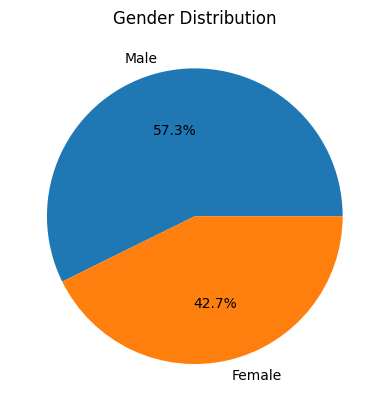

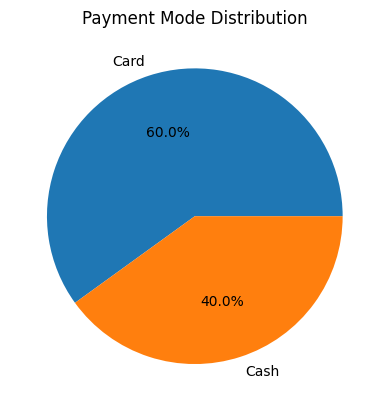

In [34]:
genders=masterdata['Gender'].value_counts()
payment_type=masterdata['Payment_Mode'].value_counts()

# Pie chart for gender
plt.pie(genders, labels=genders.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

# Pie chart for payment mode
plt.pie(payment_type, labels=payment_type.index, autopct='%1.1f%%')
plt.title("Payment Mode Distribution")
plt.show()

#%57.3 of all Pink Cab and Yellow Cab users are male and %42.7 of all Pink Cab and Yellow Cab users are female
#%60 of the all payments are made with card, %40 of the all payments are made with cash.


In [17]:
#Correlation matrix is created to understand the relationships between attributes.
#Some of the columns are ignored which don't contain numeric values values such as gender, payment mode, transaction id, customer id.
corr_matrix = masterdata[['Age','Income (USD/Month)','KM Travelled', 'Price Charged','Cost of Trip', 'Population', 'Users', 'Profit', 'Year', 'Month','Day']].corr()

# display the correlation matrix
print(corr_matrix)

                         Age  Income (USD/Month)  KM Travelled  Price Charged  \
Age                 1.000000            0.003907     -0.000369      -0.003084   
Income (USD/Month)  0.003907            1.000000     -0.000544       0.003228   
KM Travelled       -0.000369           -0.000544      1.000000       0.835753   
Price Charged      -0.003084            0.003228      0.835753       1.000000   
Cost of Trip       -0.000189           -0.000633      0.981848       0.859812   
Population         -0.009002            0.011868     -0.002311       0.326589   
Users              -0.005906            0.010464     -0.000428       0.281061   
Profit             -0.005093            0.006148      0.462768       0.864154   
Year               -0.000764           -0.001714     -0.000979      -0.036068   
Month              -0.001721            0.000658     -0.002089      -0.061590   
Day                -0.001013            0.001117      0.000931      -0.005644   

                    Cost of

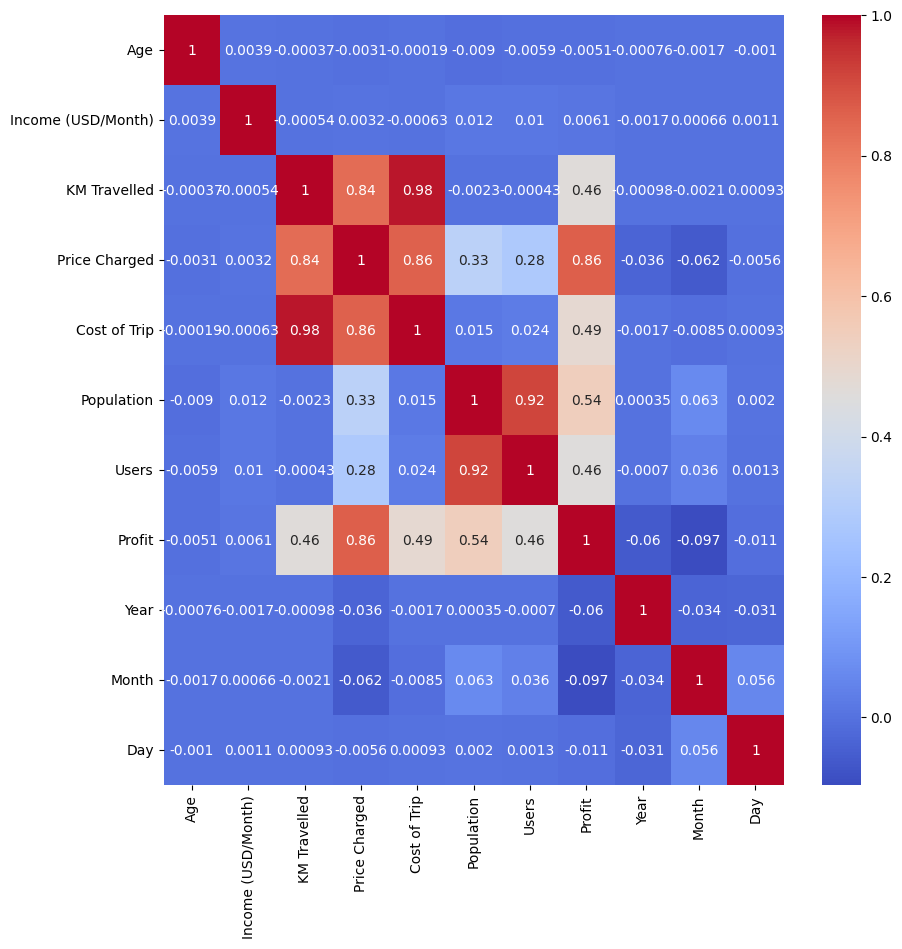

In [18]:
#visualize the correlation matrix 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# display the heatmap
plt.show()

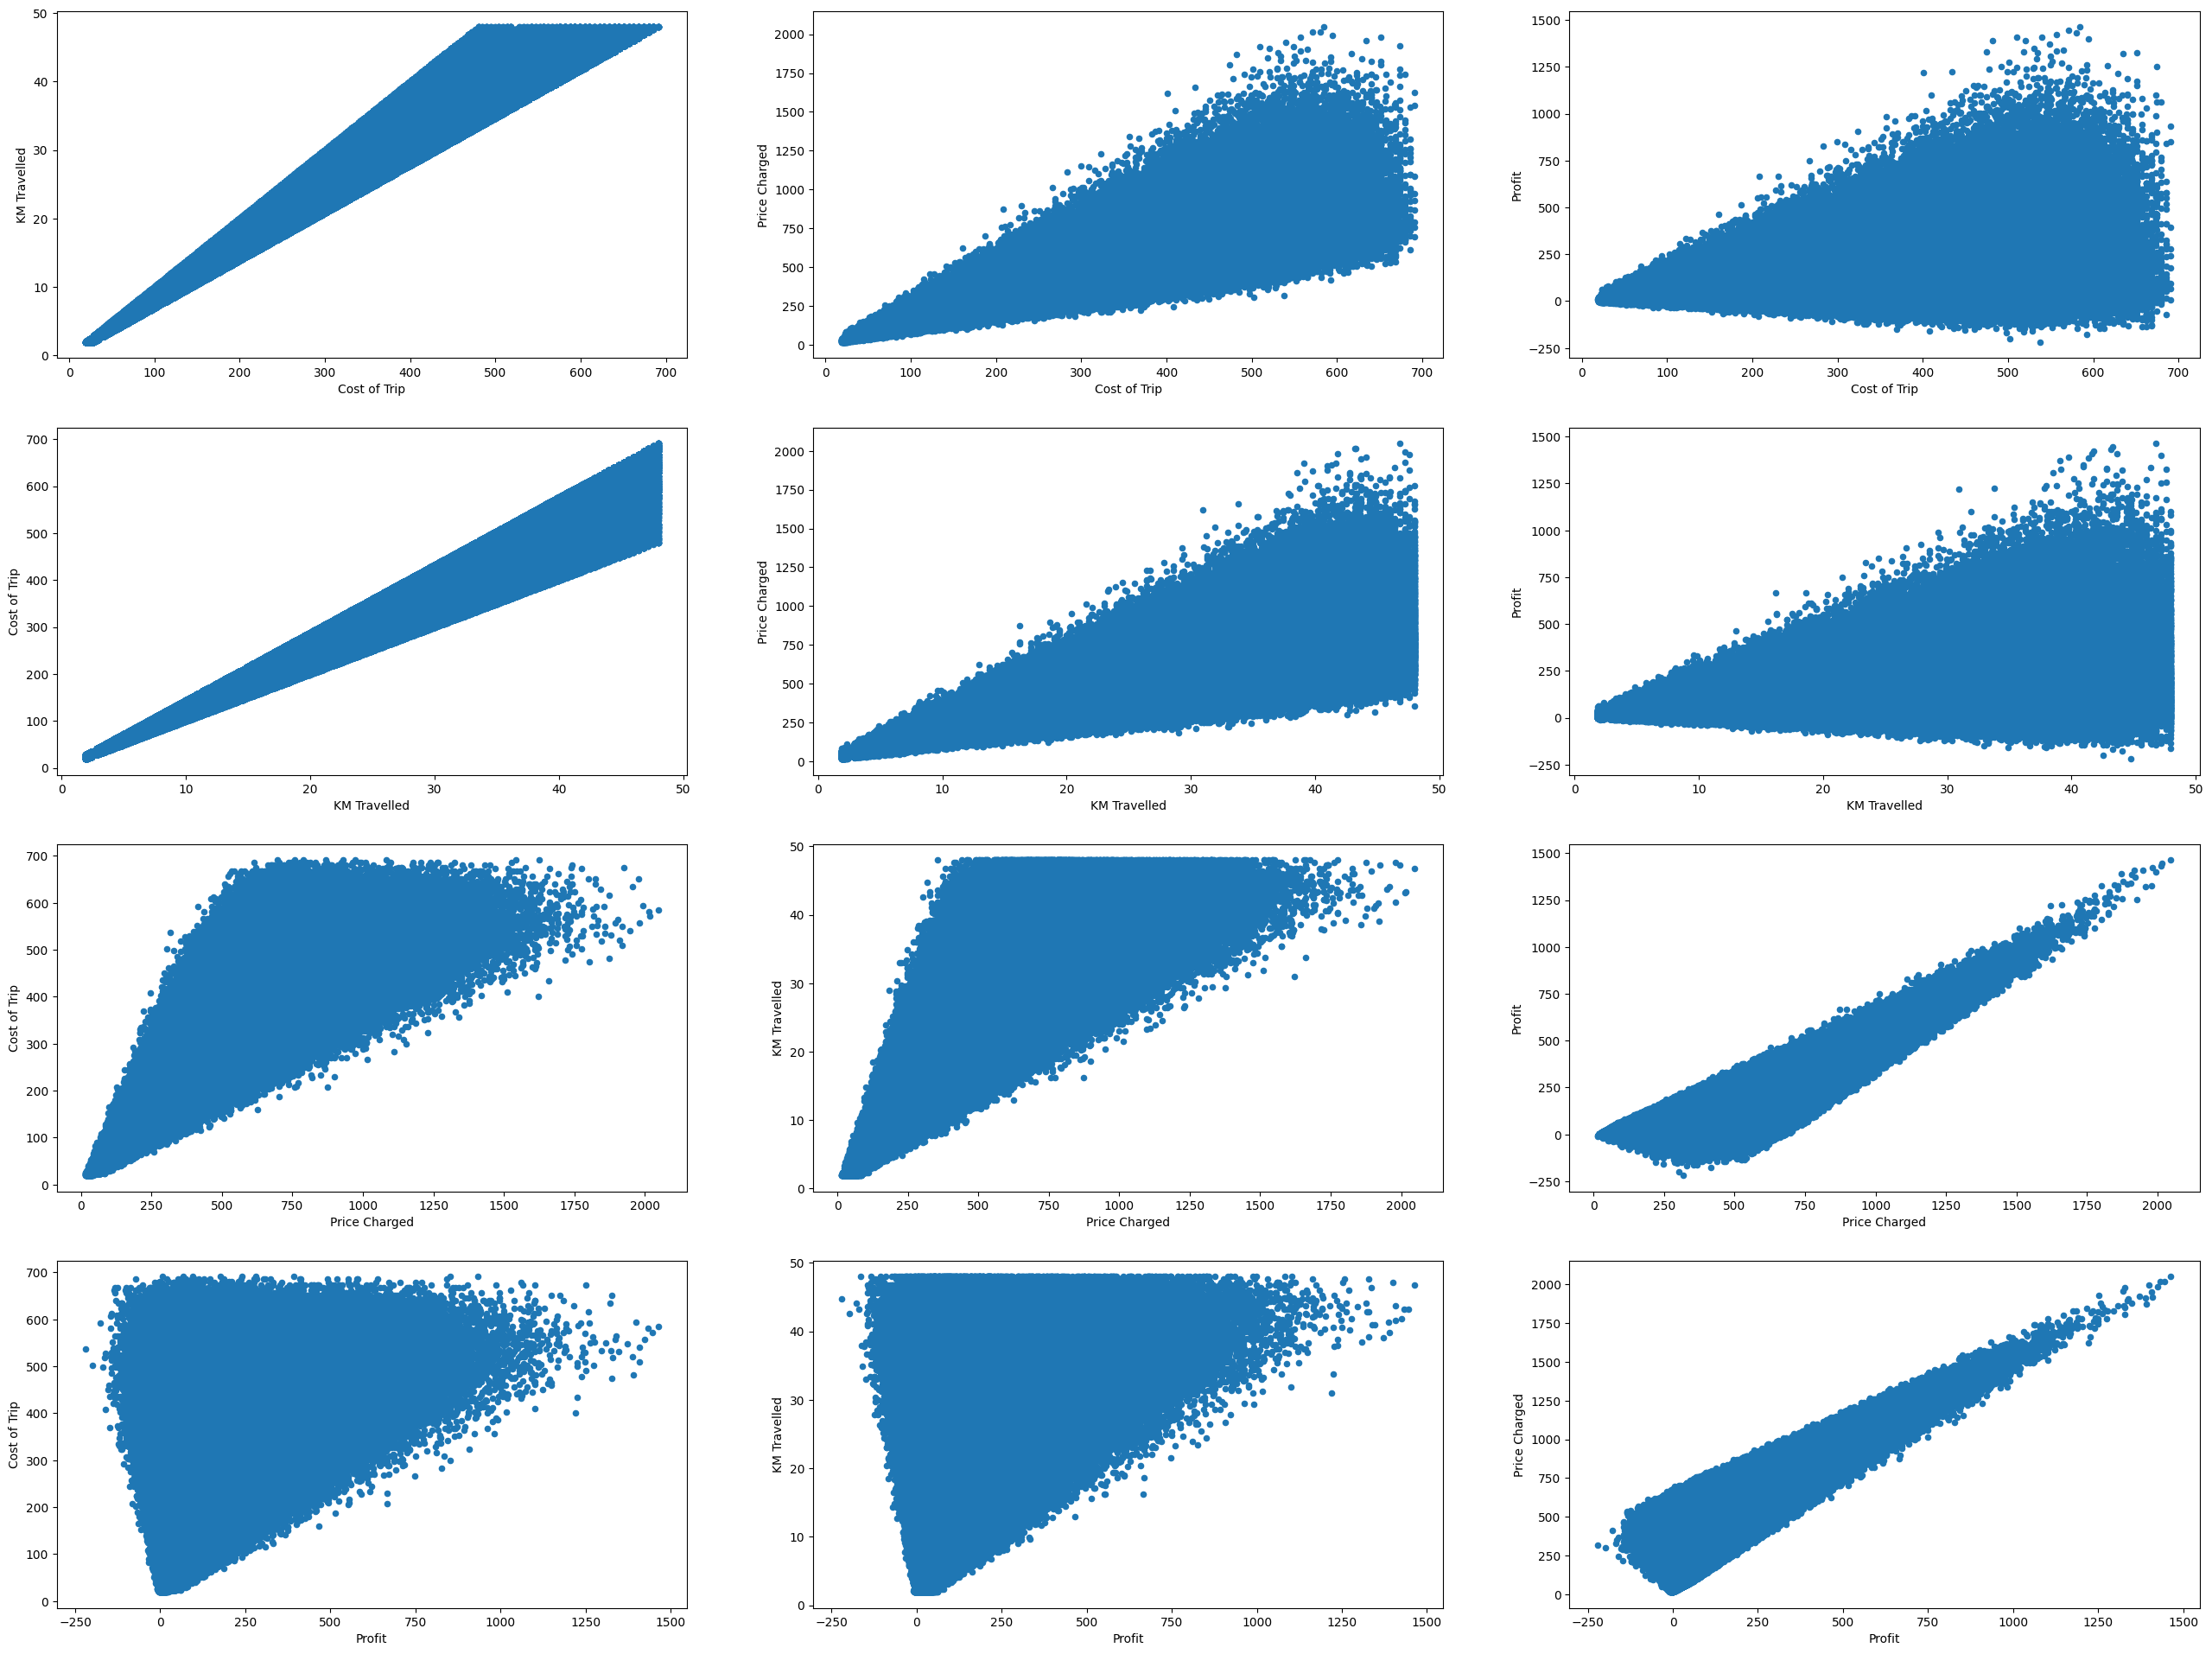

In [19]:
#Heatmap emphasize that 'Cost of Trip', 'KM Travelled', 'Price Charged', 'Profit' are highly related.
#Additionally, there exists positive correlation between 'Users' and 'Population'


# Create figure with two rows of three subplots each
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(32, 24))

# Create scatterplot in each subplot
masterdata.plot(kind='scatter', x='Cost of Trip', y='KM Travelled', ax=axes[0, 0])
masterdata.plot(kind='scatter', x='Cost of Trip', y='Price Charged', ax=axes[0, 1])
masterdata.plot(kind='scatter', x='Cost of Trip', y='Profit', ax=axes[0, 2])

masterdata.plot(kind='scatter', x='KM Travelled', y='Cost of Trip', ax=axes[1, 0])
masterdata.plot(kind='scatter', x='KM Travelled', y='Price Charged', ax=axes[1, 1])
masterdata.plot(kind='scatter', x='KM Travelled', y='Profit', ax=axes[1, 2])

masterdata.plot(kind='scatter', x='Price Charged', y='Cost of Trip', ax=axes[2, 0])
masterdata.plot(kind='scatter', x='Price Charged', y='KM Travelled', ax=axes[2, 1])
masterdata.plot(kind='scatter', x='Price Charged', y='Profit', ax=axes[2, 2])

masterdata.plot(kind='scatter', x='Profit', y='Cost of Trip', ax=axes[3, 0])
masterdata.plot(kind='scatter', x='Profit', y='KM Travelled', ax=axes[3, 1])
masterdata.plot(kind='scatter', x='Profit', y='Price Charged', ax=axes[3, 2])

# Show plot
plt.show()

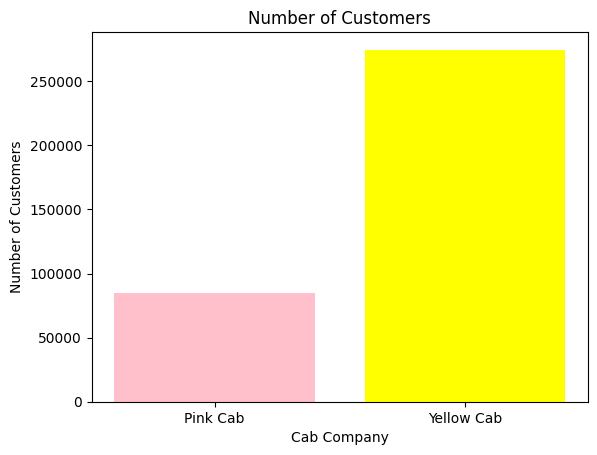

In [20]:
#Now, let's learn more about the cab companies.
count_pink = masterdata['Company'].str.count('Pink Cab').sum()
count_yellow = masterdata['Company'].str.count('Yellow Cab').sum()


x=['Pink Cab', 'Yellow Cab']
y=[count_pink,count_yellow]
plt.bar(x, y)

plt.bar(x[1], y[1], color='yellow')

plt.bar(x[0], y[0], color='pink')


plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Number of Customers')


plt.show()

#We can observe that 'Yellow Cab' company have more users than 'Pink Cab'

The total profit for Pink Cab is 5307328.321
The total profit for Yellow Cab is 44020373.17080002
profit/#customer for Pink Cab is:  62.65217410961977
profit/#customer for Yellow Cab is:  160.25998584103021


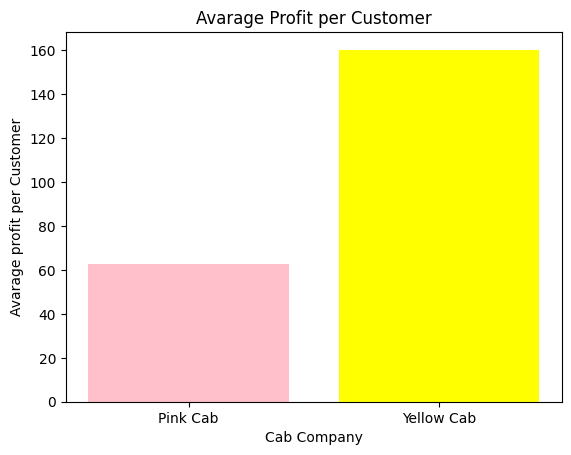

'A higher average profit per customer can indicate that the company is effectively targeting its most profitable\n customers and maximizing revenue from them. On the other hand, a lower average profit per customer \nmay suggest that the company needs to re-evaluate its marketing and sales strategies to attract more profitable customers.'

In [21]:
#Dividing the number of customers by the profit for each company would give us a ratio of customers to profit.

total_profit_pink = masterdata.loc[masterdata['Company'] == 'Pink Cab', 'Profit'].sum()

print(f"The total profit for {'Pink Cab'} is {total_profit_pink}")

total_profit_yellow = masterdata.loc[masterdata['Company'] == 'Yellow Cab', 'Profit'].sum()

print(f"The total profit for {'Yellow Cab'} is {total_profit_yellow}")

avg_profit_per_customer_pink=total_profit_pink/count_pink
avg_profit_per_customer_yellow=total_profit_yellow/count_yellow
print('profit/#customer for Pink Cab is: ', avg_profit_per_customer_pink)
print('profit/#customer for Yellow Cab is: ', avg_profit_per_customer_yellow)

# Create the bar plot
x=['Pink Cab', 'Yellow Cab']
y=[avg_profit_per_customer_pink,avg_profit_per_customer_yellow]
plt.bar(x, y)

plt.bar(x[1], y[1], color='yellow')


plt.bar(x[0], y[0], color='pink')


plt.xlabel('Cab Company')
plt.ylabel('Avarage profit per Customer')
plt.title('Avarage Profit per Customer')


plt.show()

"""A higher average profit per customer can indicate that the company is effectively targeting its most profitable
 customers and maximizing revenue from them. On the other hand, a lower average profit per customer 
may suggest that the company needs to re-evaluate its marketing and sales strategies to attract more profitable customers."""

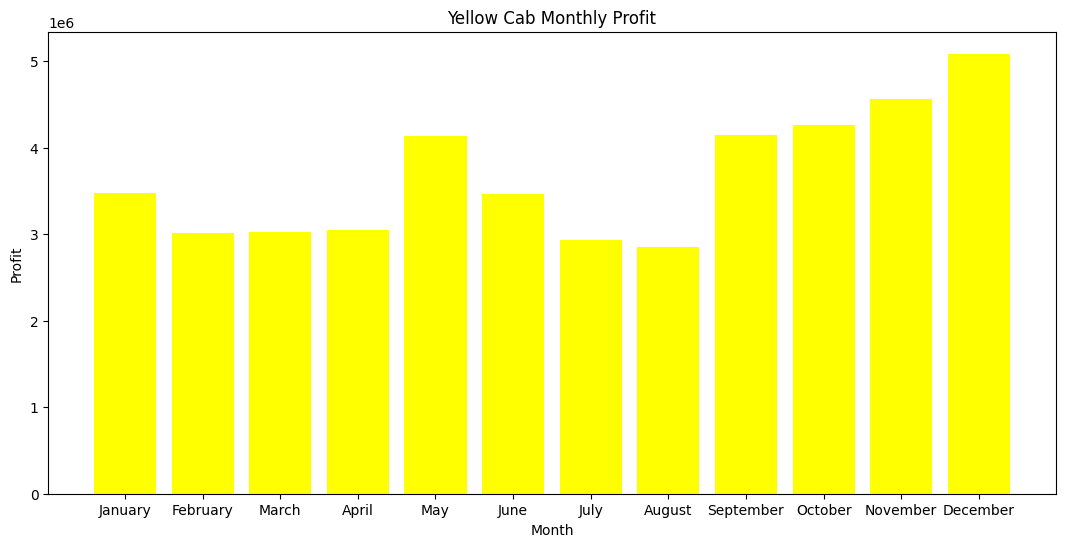

In [22]:
#Now, let's see monthly profit for both of the companies.

plt.figure(figsize=(13,6))

company_month_grouped = masterdata.groupby(['Company', 'Month'])

# Calculate monthly profits for Yellow Cab
yc_monthly_profit = company_month_grouped['Profit'].sum()['Yellow Cab']

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.bar(order, yc_monthly_profit.values,color='yellow')


plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Yellow Cab Monthly Profit')

plt.show()

#Yellow Cab's monthly profit increases in April-May and August-December
#In December Yellow Cab reach the most profit.

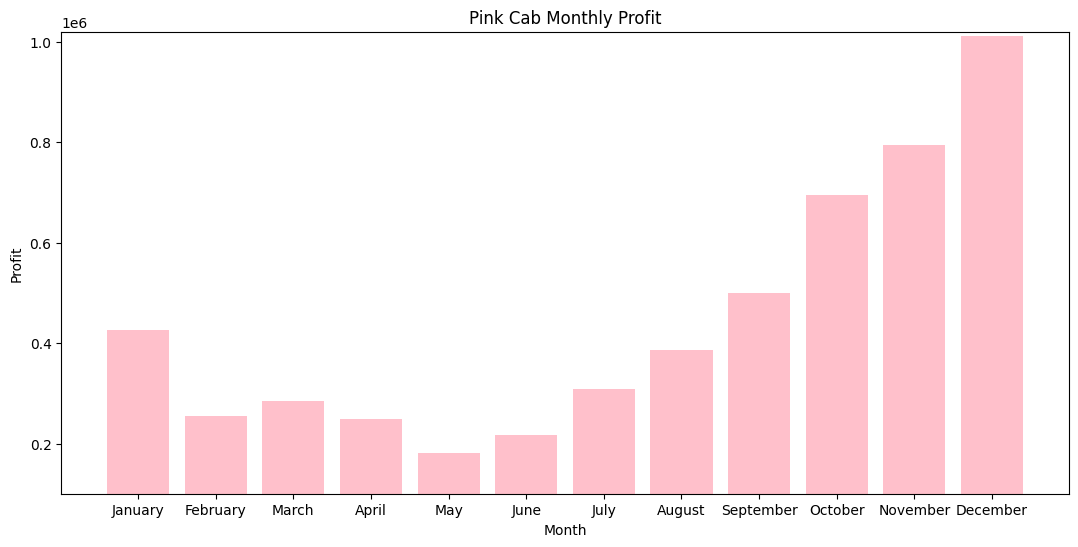

In [101]:
# Monthly profit for Pink Cab

plt.figure(figsize=(13,6))

pc_monthly_profit = masterdata[masterdata['Company'] == 'Pink Cab'].groupby('Month')['Profit'].sum()

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Create a bar plot of the monthly profits for Pink Cab
plt.bar(order, pc_monthly_profit.values, color='pink')


plt.xlabel('Month')
plt.ylabel('Profit')

plt.title('Pink Cab Monthly Profit')
plt.ylim(bottom=100000, top=1020000)

plt.show()

# In December, Pink Cab reaches the highest profit.
# Pink Cab's monthly profit increases in April-May and August-December.




Year
2016    67.973254
2017    67.103261
2018    53.537172
2019    76.623379
Name: Profit, dtype: float64


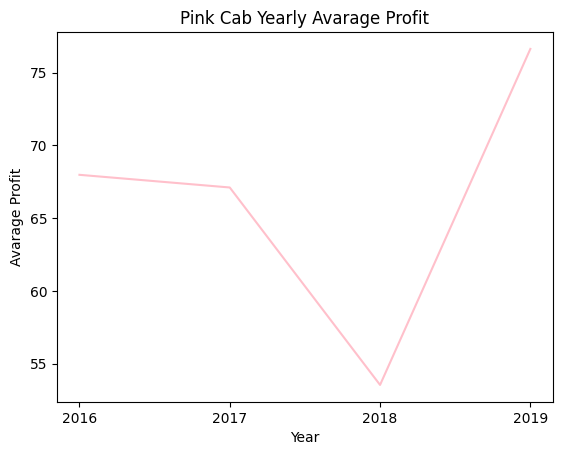

In [15]:
# Now let's see yearly profit for each company. Line plot is used.
pink_profit=masterdata[masterdata.Company=='Pink Cab'].groupby(masterdata['Year']).Profit.mean()

print(pink_profit)

plt.plot(['2016','2017','2018','2019'], pink_profit.values, color='pink')
plt.xlabel('Year')
plt.ylabel('Avarage Profit')
plt.title('Pink Cab Yearly Avarage Profit')
plt.show()


Year
2016    169.311790
2017    168.855795
2018    143.669510
2019     89.836398
Name: Profit, dtype: float64


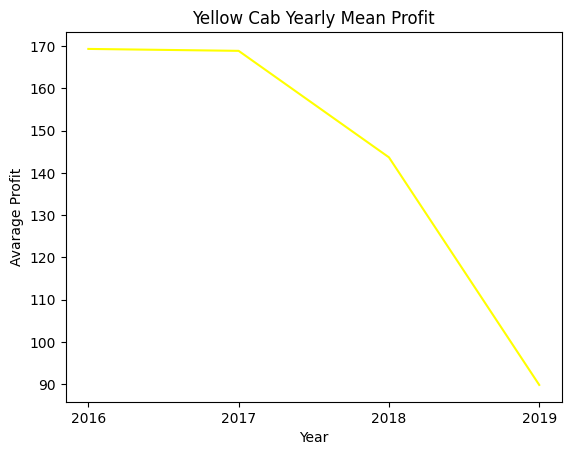

In [40]:
# Now let's see yearly profit for Yellow Cab 
yellow_profit=masterdata[masterdata.Company=='Yellow Cab'].groupby(masterdata['Year']).Profit.mean()

print(yellow_profit)

plt.plot(['2016','2017','2018','2019'], yellow_profit.values, color='yellow')
plt.xlabel('Year')
plt.ylabel('Avarage Profit')
plt.title('Yellow Cab Yearly Mean Profit')
plt.show()

Company
Pink Cab      13.776685
Yellow Cab    20.300921
dtype: float64
Yellow Cab average cost per km:  13.200564873435
Pink Cab average cost per km:  10.998602306666196
Yellow Cab ratio: 0.6502263525293976
Pink Cab ratio: 0.7984169835482956


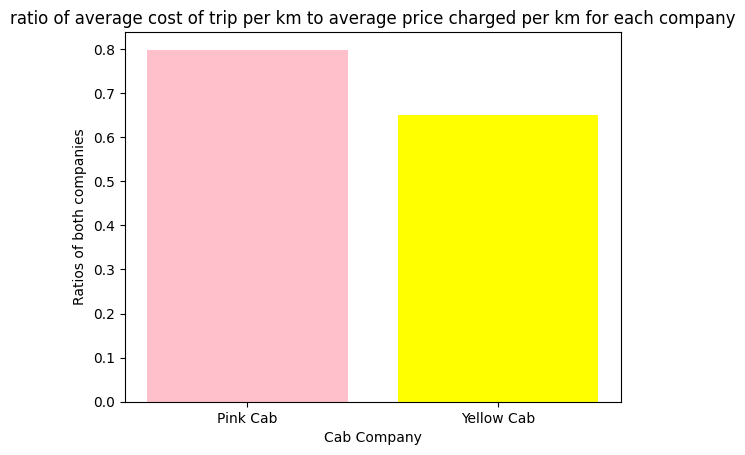

In [26]:
#Avarage price per KM for both companies

# Group the data by company and calculate the mean of price charged per km
avg_price_per_km = masterdata.groupby("Company")["Price Charged"].mean() / masterdata.groupby("Company")["KM Travelled"].mean()

print(avg_price_per_km)

# Calculate the average cost per km for Yellow Cab
yc_avg_cost_per_km = (masterdata[masterdata['Company']=='Yellow Cab']['Cost of Trip'] / masterdata[masterdata['Company']=='Yellow Cab']['KM Travelled']).mean()

# Calculate the average cost per km for Pink Cab
pc_avg_cost_per_km = (masterdata[masterdata['Company']=='Pink Cab']['Cost of Trip'] / masterdata[masterdata['Company']=='Pink Cab']['KM Travelled']).mean()

print("Yellow Cab average cost per km: ", yc_avg_cost_per_km)
print("Pink Cab average cost per km: ", pc_avg_cost_per_km)


# Calculate average cost per km for each company
yc_avg_cost_per_km = masterdata[masterdata['Company']=='Yellow Cab']['Cost of Trip'].mean() / masterdata[masterdata['Company']=='Yellow Cab']['KM Travelled'].mean()
pc_avg_cost_per_km = masterdata[masterdata['Company']=='Pink Cab']['Cost of Trip'].mean() / masterdata[masterdata['Company']=='Pink Cab']['KM Travelled'].mean()

# Calculate average price charged per km for each company
yc_avg_price_per_km = masterdata[masterdata['Company']=='Yellow Cab']['Price Charged'].mean() / masterdata[masterdata['Company']=='Yellow Cab']['KM Travelled'].mean()
pc_avg_price_per_km = masterdata[masterdata['Company']=='Pink Cab']['Price Charged'].mean() / masterdata[masterdata['Company']=='Pink Cab']['KM Travelled'].mean()

# Calculate ratio of average cost of trip per km to average price charged per km for each company
yc_ratio = yc_avg_cost_per_km / yc_avg_price_per_km
pc_ratio = pc_avg_cost_per_km / pc_avg_price_per_km

print("Yellow Cab ratio:", yc_ratio)
print("Pink Cab ratio:", pc_ratio)

# Create the bar plot
x=['Pink Cab', 'Yellow Cab']
y=[pc_ratio,yc_ratio]
plt.bar(x, y)


plt.bar(x[1], y[1], color='yellow')
plt.bar(x[0], y[0], color='pink')

plt.xlabel('Cab Company')
plt.ylabel('Ratios of both companies')
plt.title('ratio of average cost of trip per km to average price charged per km for each company')
plt.show()


#Pink Cab's ratio is higher than Yellow Cab's ratio. Larger ratio indicates that Pink Cab does not charge it's customer enough
#to afford their cost of travel. There this situation causes Pink Cab's failure to get more profit.

In [41]:
a = masterdata.groupby(['Year','Company'])['Transaction ID'].count().to_frame().reset_index()
a

,Year,Company,Transaction ID
0,2016,Pink Cab,24907
1,2016,Yellow Cab,81609
2,2017,Pink Cab,30314
3,2017,Yellow Cab,98272
4,2018,Pink Cab,29432
5,2018,Yellow Cab,94602
6,2019,Pink Cab,58
7,2019,Yellow Cab,198


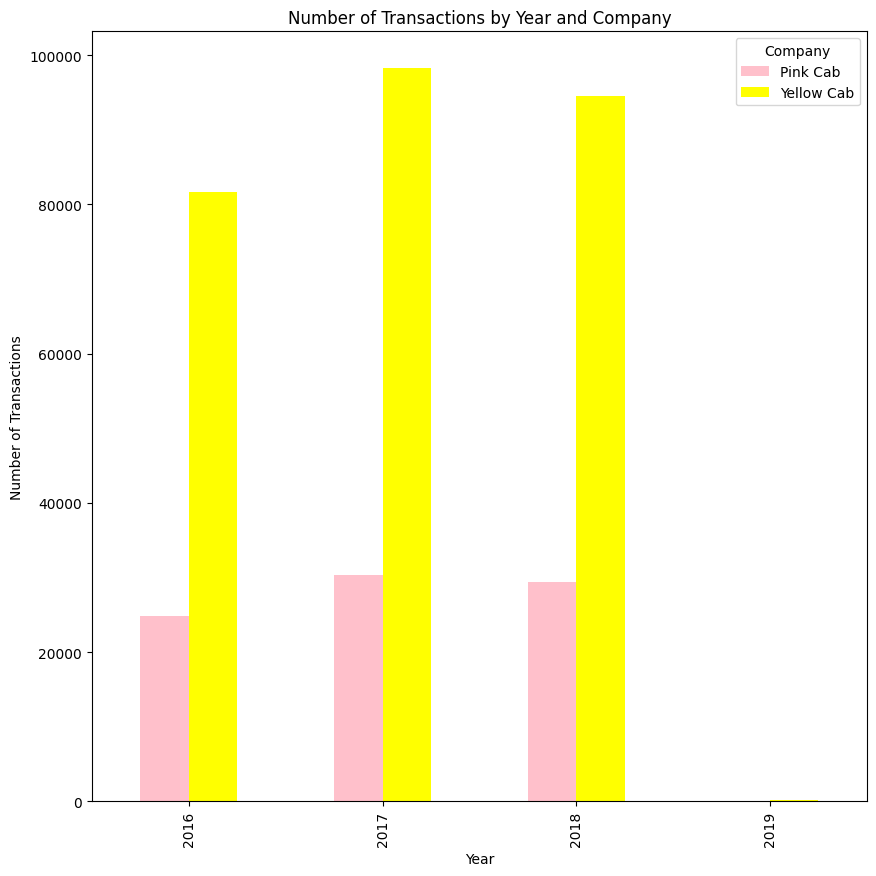

In [53]:
# Pivot the data to create separate columns for Yellow Cab and Pink Cab transaction counts
a_pivot = a.pivot(index='Year', columns='Company', values='Transaction ID')

colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}

# Plot the bar chart
ax = a_pivot.plot(kind='bar', figsize=(10, 10), color=a_pivot.columns.map(colors))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of Transactions by Year and Company')

plt.show()
#Since the number of transactions are very low for both of the cab companies on 2019. We can barely observe the values on bar chart.


In [55]:
#Now we can observe the number of transactions for each city.

abcd = masterdata.groupby(['Company','City'])['Transaction ID'].count().to_frame().reset_index()
abcd

,Company,City,Transaction ID
0,Pink Cab,ATLANTA GA,1762
1,Pink Cab,AUSTIN TX,1868
2,Pink Cab,BOSTON MA,5186
3,Pink Cab,CHICAGO IL,9361
4,Pink Cab,DALLAS TX,1380
5,Pink Cab,DENVER CO,1394
6,Pink Cab,LOS ANGELES CA,19865
7,Pink Cab,MIAMI FL,2002
8,Pink Cab,NASHVILLE TN,1841
9,Pink Cab,NEW YORK NY,13967


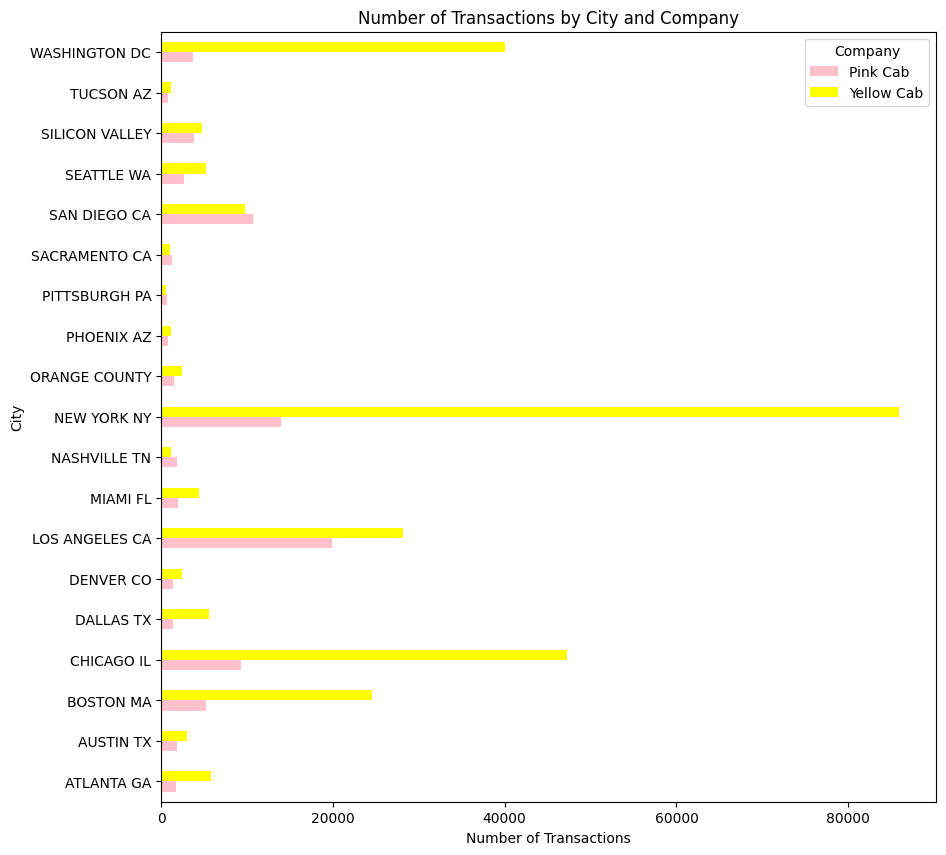

In [87]:

abcd_pivot = abcd.pivot(index='City', columns='Company', values='Transaction ID')


colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}


# Plot the bar chart
ax = abcd_pivot.plot(kind='barh', figsize=(10, 10), color=abcd_pivot.columns.map(colors))
ax.set_xlabel('Number of Transactions')
ax.set_ylabel('City')
ax.set_title('Number of Transactions by City and Company')

plt.show()

#This plot emphasizes that in most of the cities, number of transacion of Yellow Cab is more than number of transactions of Pink Cab.
#The only cities that Pink Cab has more number of transaction is Nashville TN, Pitsburgh PA, Sacramento CA, San Diego CA.
#Initially we identified that there are 19 unique cities. And this bar chart shows that Yellow Cab's number of transaction is more than Pink Cab's number of transaction in 15 cities.


In [67]:
pm = masterdata.groupby(['Company','Payment_Mode'])['Transaction ID'].count().to_frame().reset_index()
# Pivot the data to create separate columns for Yellow Cab and Pink Cab transaction counts
pm

,Company,Payment_Mode,Transaction ID
0,Pink Cab,Card,50719
1,Pink Cab,Cash,33992
2,Yellow Cab,Card,164785
3,Yellow Cab,Cash,109896


In [76]:

prft = masterdata.groupby(['Company','City'])['Profit'].count().to_frame().reset_index()
prft

,Company,City,Profit
0,Pink Cab,ATLANTA GA,1762
1,Pink Cab,AUSTIN TX,1868
2,Pink Cab,BOSTON MA,5186
3,Pink Cab,CHICAGO IL,9361
4,Pink Cab,DALLAS TX,1380
5,Pink Cab,DENVER CO,1394
6,Pink Cab,LOS ANGELES CA,19865
7,Pink Cab,MIAMI FL,2002
8,Pink Cab,NASHVILLE TN,1841
9,Pink Cab,NEW YORK NY,13967


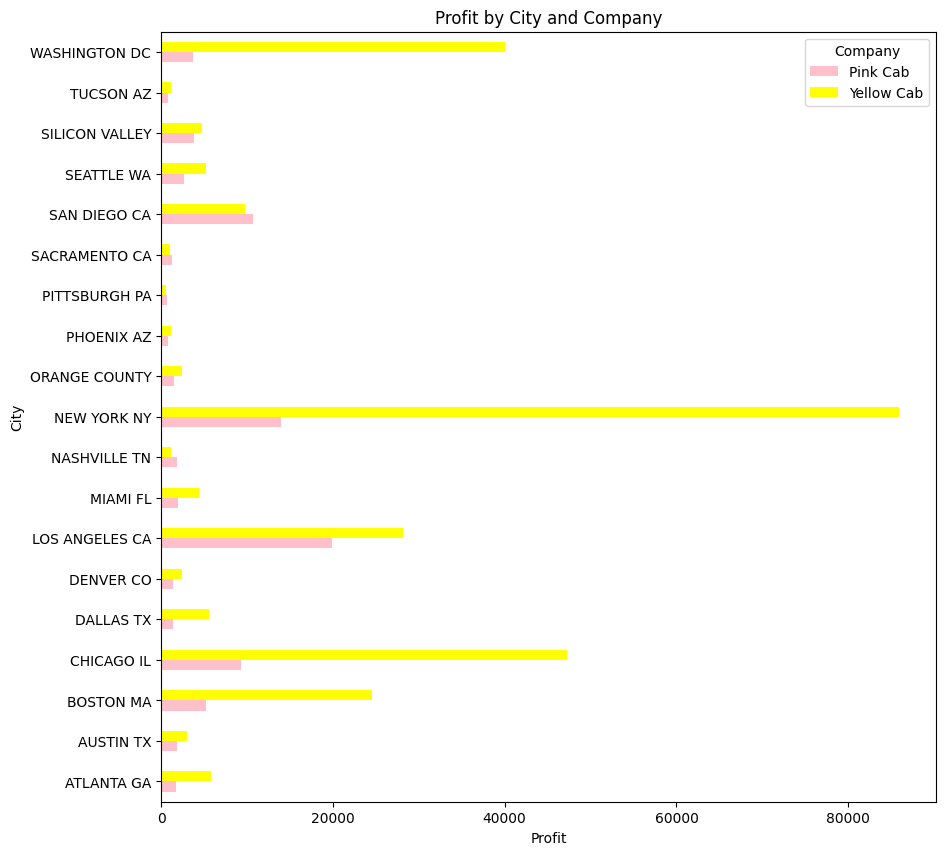

In [88]:
prft_pivot = prft.pivot(index='City', columns='Company', values='Profit')

colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}


ax = prft_pivot.plot(kind='barh', figsize=(10, 10), color=prft_pivot.columns.map(colors))
ax.set_xlabel('Profit')
ax.set_ylabel('City')
ax.set_title('Profit by City and Company')

plt.show()


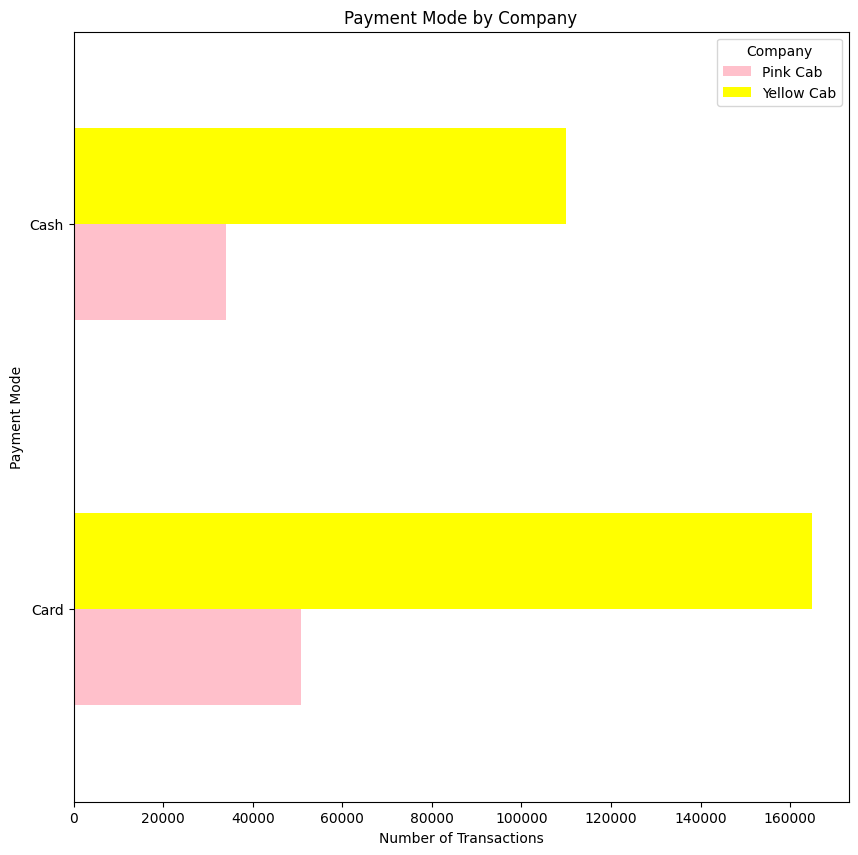

In [89]:

pm_pivot = pm.pivot(index='Payment_Mode', columns='Company', values='Transaction ID')

# Set the bar color for Yellow Cab company to yellow
colors = {'Yellow Cab': 'yellow', 'Pink Cab': 'pink'}


# Plot the bar chart
ax = pm_pivot.plot(kind='barh', figsize=(10, 10), color=pm_pivot.columns.map(colors))
ax.set_xlabel('Number of Transactions')
ax.set_ylabel('Payment Mode')
ax.set_title('Payment Mode by Company')

plt.show()

#Number of transactions that is paid with card is more than number of transaction that is paid with cash for both of the companies.

In [82]:
genderpink = masterdata.loc[masterdata['Company'] == 'Pink Cab', 'Gender'].value_counts()
genderpink

Male      47231
Female    37480
Name: Gender, dtype: int64

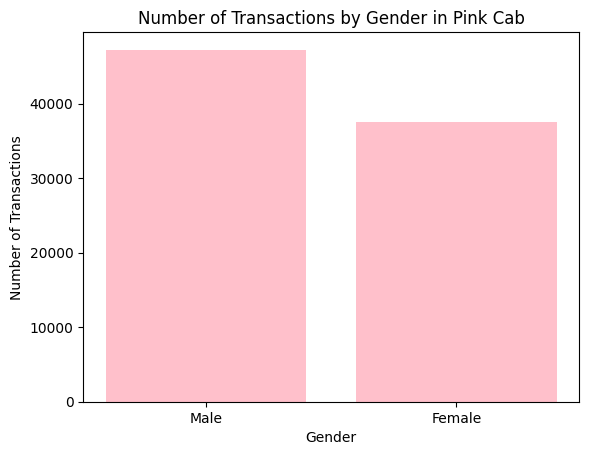

In [85]:
plt.bar(genderpink.index, genderpink.values, color='pink')
plt.title('Number of Transactions by Gender in Pink Cab')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

In [83]:
genderyellow = masterdata.loc[masterdata['Company'] == 'Yellow Cab', 'Gender'].value_counts()
genderyellow

Male      158681
Female    116000
Name: Gender, dtype: int64

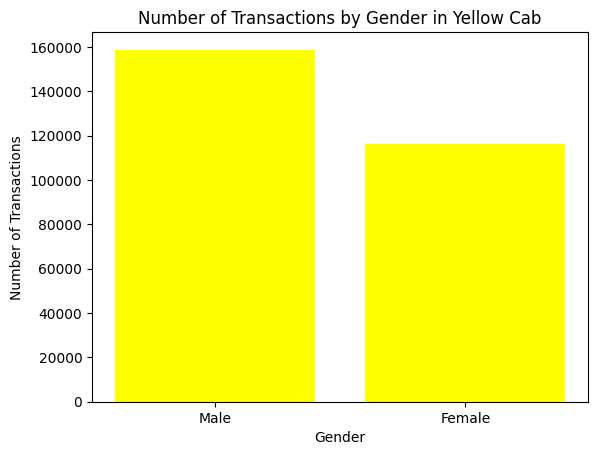

In [86]:
plt.bar(genderyellow.index, genderyellow.values, color='yellow')
plt.title('Number of Transactions by Gender in Yellow Cab')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

In [ ]:
#Conclusion:Overall, EDA emphasize that Yellow Cab has more users, more overall profit, more profit in the cities that is serving, more profit per customer than Pink Cab. On the other hand, avarage yearly profit of Yellow Cab is dramatically decreasing in 2019 and avarage yearly 
#profit of Pink Cab is dramatically increasing in 2019. If we consider the overall result, Yellow Cab is better choice to invest in.